### Euclidean Distance

In [3]:
import scipy
from scipy.spatial import distance
import numpy as np

In [4]:
a = [1, 2, 3]
b = [4, 5, 6]

dst = distance.euclidean(a, b)

In [5]:
dst

5.196152422706632

### Minkowski Distance

In [6]:
# Manhattan Distance
distance.minkowski([1, 0, 0], [0, 1, 0], 1)

2.0

In [7]:
# Euclidean Distance
distance.minkowski([1, 0, 0], [0, 1, 0], 2)

1.4142135623730951

In [8]:
distance.minkowski([1, 2, 3], [4, 5, 6], 2)

5.196152422706632

In [9]:
distance.minkowski([1, 2, 3], [4, 5, 6], 3)

4.3267487109222245

### Dissimilarity or Distance Matrix 

In [10]:
import pandas as pd
from scipy.spatial import distance_matrix

In [11]:
data = [[1, 4], [2, 5], [3, 6]]
df = pd.DataFrame(data, columns=['a', 'b'])
df

,a,b
0,1,4
1,2,5
2,3,6


In [12]:
pd.DataFrame(distance_matrix(df.values, df.values))

,0,1,2
0,0.000000,1.414214,2.828427
1,1.414214,0.000000,1.414214
2,2.828427,1.414214,0.000000


### Data Matrix

In [13]:
data = [[15, 95], [49, 156], [13, 95], [45, 160], [85, 178], [66, 176], [12, 90], [10, 78]]
ctys = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
df = pd.DataFrame(data, columns=['Weight', 'Height'], index=ctys)
df

,Weight,Height
A,15,95
B,49,156
C,13,95
D,45,160
E,85,178
F,66,176
G,12,90
H,10,78


In [14]:
Distance_matrix = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
Distance_matrix

,A,B,C,D,E,F,G,H
A,0.000000,69.835521,2.000000,71.589105,108.577162,95.718337,5.830952,17.720045
B,69.835521,0.000000,70.830784,5.656854,42.190046,26.248809,75.663730,87.206651
C,2.000000,70.830784,0.000000,72.449983,109.877204,96.798760,5.099020,17.262677
D,71.589105,5.656854,72.449983,0.000000,43.863424,26.400758,77.388630,89.157165
E,108.577162,42.190046,109.877204,43.863424,0.000000,19.104973,114.337221,125.000000
F,95.718337,26.248809,96.798760,26.400758,19.104973,0.000000,101.548018,112.871608
G,5.830952,75.663730,5.099020,77.388630,114.337221,101.548018,0.000000,12.165525
H,17.720045,87.206651,17.262677,89.157165,125.000000,112.871608,12.165525,0.000000


In [15]:
Distance_matrix.round(decimals=1, out=None)

,A,B,C,D,E,F,G,H
A,0.0,69.8,2.0,71.6,108.6,95.7,5.8,17.7
B,69.8,0.0,70.8,5.7,42.2,26.2,75.7,87.2
C,2.0,70.8,0.0,72.4,109.9,96.8,5.1,17.3
D,71.6,5.7,72.4,0.0,43.9,26.4,77.4,89.2
E,108.6,42.2,109.9,43.9,0.0,19.1,114.3,125.0
F,95.7,26.2,96.8,26.4,19.1,0.0,101.5,112.9
G,5.8,75.7,5.1,77.4,114.3,101.5,0.0,12.2
H,17.7,87.2,17.3,89.2,125.0,112.9,12.2,0.0


### K-Means Clustering

In [16]:
import matplotlib.pyplot as plt

In [17]:
data = pd.read_excel('Data Files/Clustering_ex.xlsx')
data

,Variable_1,Variable_2
0,1.0,1.0
1,1.5,2.0
2,3.0,4.0
3,5.0,7.0
4,3.5,5.0
5,4.5,5.0
6,3.5,4.5


<Figure size 360x360 with 0 Axes>

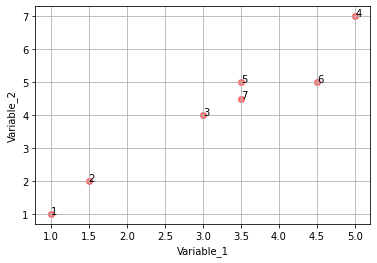

In [18]:
fig = plt.figure(figsize=(5, 5))
x = data['Variable_1']
y = data['Variable_2']
n = range(1, 8)
fig, ax = plt.subplots()
ax.scatter(x, y, marker='o', c='red', alpha=0.5)
plt.grid()
plt.xlabel('Variable_1')
plt.ylabel('Variable_2')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

In [21]:
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_

In [22]:
centroids

array([[3.9 , 5.1 ],
       [1.25, 1.5 ]])

<Figure size 360x360 with 0 Axes>

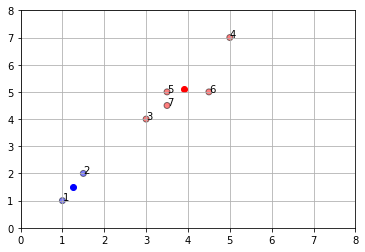

In [25]:
fig = plt.figure(figsize= (5, 5))
colmap = {1:'r', 2:'b'}
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
fig, ax = plt.subplots()
ax.scatter(x, y, color=colors1, alpha=0.5, edgecolors='k')

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color = colmap[idx+1])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.grid()
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

Example 2

In [26]:
data1 = pd.read_excel('Data Files/datapoints.xlsx')
data1

,x,y
0,2,10
1,2,5
2,8,4
3,5,8
4,7,5
5,6,4
6,1,2
7,4,9


<Figure size 360x360 with 0 Axes>

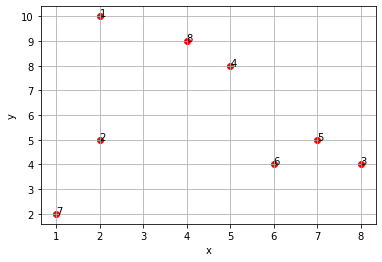

In [29]:
fig = plt.figure(figsize=(5, 5))
X = data1['x']
Y = data1['y']
n = range(1, 9)
fig, ax = plt.subplots()
ax.scatter(X, Y, color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

for i, txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]))

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data1)

KMeans(n_clusters=3)

In [32]:
labels = kmeans.predict(data1)
centroids = kmeans.cluster_centers_

<Figure size 360x360 with 0 Axes>

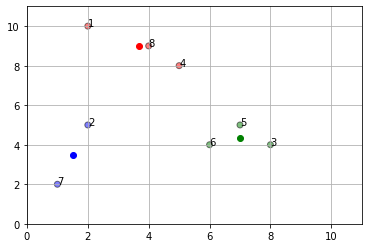

In [33]:
fig = plt.figure(figsize= (5, 5))
colmap = {1:'r', 2:'g', 3:'b'}
colors = map(lambda X: colmap[X+1], labels)
colors1 = list(colors)
fig, ax = plt.subplots()
ax.scatter(X, Y, color=colors1, alpha=0.5, edgecolor='k')

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color = colmap[idx+1])

for i, txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]))

plt.grid()
plt.xlim(0, 11)
plt.ylim(0, 11)
plt.show()